# Factor Model for our Portfolio

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from contract_portfolio import ContractPortfolio
from factor_portfolio import FactorPortfolio, factor_symbols
import portfolio_utils as utils

Building Portfolio

In [26]:
# Initialize Portfolio objects
contract_portfolio = ContractPortfolio()
portfolio_returns = contract_portfolio.get_returns()

Contract 1 / 40 (6A) added to the portfolio.
Contract 2 / 40 (6C) added to the portfolio.
Contract 3 / 40 (6S) added to the portfolio.
Contract 4 / 40 (KC) added to the portfolio.
Contract 5 / 40 (HG) added to the portfolio.


In [38]:
# Initialize FactorPortfolio object
factor_portfolio = FactorPortfolio(start_date=portfolio_returns.index[0], end_date=portfolio_returns.index[-1])

FactorPortfolio initialized with start date: 1987-01-13 00:00:00 and end date: 2023-01-26 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


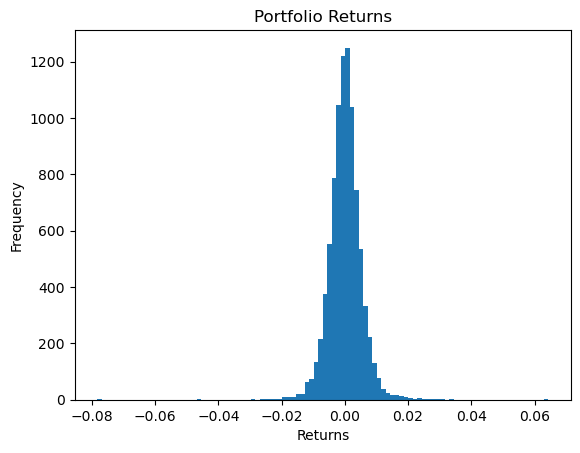

In [27]:
# Plotting returns
plt.hist(portfolio_returns, bins=100)
plt.title('Portfolio Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Building factor model pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold

In [30]:
model = Pipeline([('lasso_regressor', Lasso())])
model.get_params()

{'memory': None,
 'steps': [('lasso_regressor', Lasso())],
 'verbose': False,
 'lasso_regressor': Lasso(),
 'lasso_regressor__alpha': 1.0,
 'lasso_regressor__copy_X': True,
 'lasso_regressor__fit_intercept': True,
 'lasso_regressor__max_iter': 1000,
 'lasso_regressor__positive': False,
 'lasso_regressor__precompute': False,
 'lasso_regressor__random_state': None,
 'lasso_regressor__selection': 'cyclic',
 'lasso_regressor__tol': 0.0001,
 'lasso_regressor__warm_start': False}

In [47]:
# Join the portfolio returns to match the start date and end date of the smaller factor portfolio
portfolio_returns = portfolio_returns.loc[factor_portfolio.get_returns().index]
portfolio_returns.shape, factor_portfolio.get_returns().shape

((2968, 1), (2968, 13))

In [48]:
param_grid = {'lasso_regressor__alpha': np.logspace(-4, 4, 50)}

grid_search = GridSearchCV(model, 
                            param_grid=param_grid,
                            cv=TimeSeriesSplit(n_splits=5),
                            scoring='neg_mean_squared_error',
                            refit=True)

# Fit the model
grid_search.fit(factor_portfolio.get_returns().to_numpy(), portfolio_returns)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('lasso_regressor', Lasso())]),
             param_grid={'lasso_regressor__alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03,...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [52]:
# Plotting the regressor coefficients with respect to the factors